# Introduction to t-SNE

Learn to visualize high-dimensional data in a low-dimensional space using a nonlinear dimensionality reduction technique.

## What is t-SNE?

t-SNE (t-distributed Stochastic Neighbor Embedding) is an unsupervised non-linear dimensionality reduction technique for data exploration and visualizing high-dimensional data. Non-linear dimensionality reduction means that the algorithm allows us to separate data that cannot be separated by a straight line.

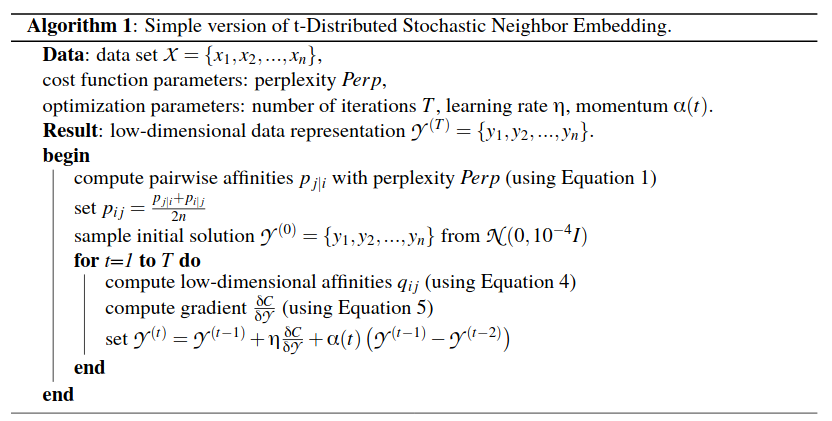
see [source](https://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf)

t-SNE gives you a feel and intuition on how data is arranged in higher dimensions. It is often used to visualize complex datasets into two and three dimensions, allowing us to understand more about underlying patterns and relationships in the data.

## Caveats of t-SNE

t-SNE has a lot of small details that should be taken into account when using it for visualization.

First, unlike PCE, t-SNE doesn't give an explicit transformation that you can reuse. So, if you have obtained some new data, the entire optimization has to start from the beginning.

This is a problem because t-SNE can be really slow. For n data points, two n x n matrices are constructed and used. The gradient also involves a summation, which puts even more computational load. Fortunately, this issue can be circumvented by clever implementations utilizing GPU or the Fourier transform.

Another issue with t-SNE is that it is not deterministic. Running the algorithm two times will yield two different results. Because of this, reading a t-SNE plot can be like reading tea leaves.

## t-SNE vs PCA

Both t-SNE and PCA are dimensional reduction techniques that have different mechanisms and work best with different types of data.

PCA (Principal Component Analysis) is a linear technique that works best with data that has a linear structure. It seeks to identify the underlying principal components in the data by projecting onto lower dimensions, maximize variance, and preserving large pairwise distances.

But, t-SNE is a nonlinear technique that focuses on preserving the pairwise similarities between data points in a lower-dimensional space. t-SNE is concerned with preserving small pairwise distances whereas, PCA focuses on maintaining large pairwise distances to maximize variance.

In summary, PCA preserves the variance in the data, whereas t-SNE preserves the relationships between data points in a lower-dimensional space, making it quite a good algorithm for visualizing complex high-dimensional data. 

## How t-SNE works

The t-SNE algorithm finds the similarity measure between pairs of instances in higher and lower dimensional space. After that, it tries to optimize two similarity measures. It does all of that in three steps. 

1. t-SNE models a point being selected as a neighbor of another point in both higher and lower dimensions. It starts by calculating a pairwise similarity between all data points in the high-dimensional space using a Gaussian kernel. The points that are far apart have a lower probability of being picked than the points that are close together. 
2. Then, the algorithm tries to map higher dimensional data points onto lower dimensional space while preserving the pairwise similarities. 
3. It is achieved by minimizing the divergence between the probability distribution of the original high-dimensional and lower-dimensional. The algorithm uses gradient descent to minimize the divergence. The lower-dimensional embedding is optimized to a stable state.

The optimization process allows the creation of clusters and sub-clusters of similar data points in the lower-dimensional space that are visualized to understand the structure and relationship in the higher-dimensional data. 

## t-SNE Python Example

In [1]:
import plotly.express as px
from sklearn.datasets import make_classification

X, y = make_classification(
    n_features=6,
    n_classes=3,
    n_samples=1500,
    n_informative=2,
    random_state=5,
    n_clusters_per_class=1,
)


fig = px.scatter_3d(x=X[:, 0], y=X[:, 1], z=X[:, 2], color=y, opacity=0.8)
fig.show()

## Fitting and Transforming PCA

We will now apply the PCA algorithm on the dataset to return two PCA components. The `fit_transform` learns and transforms the dataset at the same time. 

In [2]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

## t-SNE Visualization Python
We can now visualize the results by displaying two PCA components on a scatter plot. 

- x: First component
- y: Second companion
- color: target variable.

We have also used the `update_layout` function to add a title and rename the x-axis and y-axis.

In [3]:
fig = px.scatter(x=X_pca[:, 0], y=X_pca[:, 1], color=y)
fig.update_layout(
    title="PCA visualization of Custom Classification dataset",
    xaxis_title="First Principal Component",
    yaxis_title="Second Principal Component",
)
fig.show()

## Fitting and Transforming t-SNE

Now we will apply the t-SNE algorithm to the dataset and compare the results. 

After fitting and transforming data, we will display Kullback-Leibler (KL) divergence between the high-dimensional probability distribution and the low-dimensional probability distribution. 

Low KL divergence is a sign of better results

In [4]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)
tsne.kl_divergence_

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



1.1169195175170898

## t-SNE Visualization Python
Similar to PCA, we will visualize two t-SNE components on a scatter plot. 

In [5]:
fig = px.scatter(x=X_tsne[:, 0], y=X_tsne[:, 1], color=y)
fig.update_layout(
    title="t-SNE visualization of Custom Classification dataset",
    xaxis_title="First t-SNE",
    yaxis_title="Second t-SNE",
)
fig.show()

## t-SNE on Customer Churn Dataset

In this section, we will use the real **Customer Churn** dataset of an Iranian telecom company. The dataset contains information on the customers' activity, such as call failures and subscription length, and a churn label.

Churn means the percentage of customers that stop using a particular service during a given time frame.

## Data Dictionary
| Column                  | Explanation                                             |
|-------------------------|---------------------------------------------------------|
| Call Failure            | number of call failures                                 |
| Complaints              | binary (0: No complaint, 1: complaint)                  |
| Subscription Length     | total months of subscription                            |
| Charge Amount           | ordinal attribute (0: lowest amount, 9: highest amount) |
| Seconds of Use          | total seconds of calls                                  |
| Frequency of use        | total number of calls                                   |
| Frequency of SMS        | total number of text messages                           |
| Distinct Called Numbers | total number of distinct phone calls                    |
| Age Group               | ordinal attribute (1: younger age, 5: older age)        |
| Tariff Plan             | binary (1: Pay as you go, 2: contractual)               |
| Status                  | binary (1: active, 2: non-active)                       |
| Age                     | age of customer                                         |
| Customer Value          | the calculated value of customer                        |
| Churn                   | class label (1: churn, 0: non-churn)                    |

In [6]:
import pandas as pd

df = pd.read_csv("customer_churn.csv")
df.head(3)

,Call Failure,Complaints,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0


## PCA Dimensionality Reduction
After that, we will:

- Create features (X) and target (y) using the Churn column.
- Normalize the features using a standard scaler.
- Split the dataset into a training and testing set.
- Apply PCA to the training dataset.
- Get the score using the testing dataset. The score represents the average log-likelihood of all samples.

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('Churn', axis=1)
y = df['Churn']

scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_norm, y, random_state=13, test_size=0.25, shuffle=True
)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

pca.score(X_test)

-17.044828512881033

## Visualizing PCA
We will now visualize the PCA result using the Plotly Express scatter plot

In [8]:
fig = px.scatter(x=X_train_pca[:, 0], y=X_train_pca[:, 1], color=y_train)
fig.update_layout(
    title="PCA visualization of Customer Churn dataset",
    xaxis_title="First Principal Component",
    yaxis_title="Second Principal Component",
)
fig.show()

## Checking Perplexity vs. Divergence

For the t-SNE algorithm, perplexity is a very important hyperparameter. It controls the effective number of neighbors that each point considers during the dimensionality reduction process. 

We will run a loop to get the KL Divergence metric on various perplexities from 5 to 55 with 5 points gap. After that, we will display the result using the Plotly Express line plot.

In [9]:
import numpy as np

perplexity = np.arange(5, 55, 5)
divergence = []

for i in perplexity:
    model = TSNE(n_components=2, init="pca", perplexity=i)
    reduced = model.fit_transform(X_train)
    divergence.append(model.kl_divergence_)
fig = px.line(x=perplexity, y=divergence, markers=True)
fig.update_layout(xaxis_title="Perplexity Values", yaxis_title="Divergence")
fig.update_traces(line_color="red", line_width=1)
fig.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:986: FutureWarning:

The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:986: FutureWarning:

The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.

The KL Divergence has become constant after 40 perplexity. So, we will use 40 perplexity in t-SNE algorithm.  

In [10]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2,perplexity=40, random_state=42)
X_train_tsne = tsne.fit_transform(X_train)

tsne.kl_divergence_

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



0.2562551498413086

Visualizing t-SNE
We will now use the Plotly Scatter plot to display components and target classes. 

In [11]:
fig = px.scatter(x=X_train_tsne[:, 0], y=X_train_tsne[:, 1], color=y_train)
fig.update_layout(
    title="t-SNE visualization of Customer Churn dataset",
    xaxis_title="First t-SNE",
    yaxis_title="Second t-SNE",
)
fig.show()

As we can see, we have multiple clusters and sub-clusters. We can use this information to understand the pattern and come up with a strategy for retaining existing customers. 

## Application of t-SNE

Apart from visualizing complex multi-dimensional data, t-SNE has other uses mostly in the medical field. 

1. **Clustering and classification**: to cluster similar data points together in lower dimensional space. It can also be used for classification and finding patterns in the data. 
2. **Anomaly detection**: to identify outliers and anomalies in the data. 
3. **Natural language processing**: to visualize word embeddings generated from a large corpus of text that makes it easier to identify similarities and relationships between words.
4. **Computer security**: to visualize network traffic patterns and detect anomalies.
5. **Cancer research**: to visualize molecular profiles of tumor samples and identify subtypes of cancer. 
6. **Geological domain interpretation**: to visualize seismic attributes and to identify geological anomalies. 
7. **Biomedical signal processing**: to visualize electroencephalogram (EEG) and detect patterns of brain activity. 

## Conclusion

t-SNE is a powerful visualization tool for revealing hidden patterns and structures in complex datasets. You can use it for images, audio, biologicals, and single data to identify anomalies and patterns. 

In this notebook, we have learned about t-SNE, a popular dimensionality reduction technique that can visualize high-dimensional non-linear data in a low-dimensional space. We have explained the main idea behind t-SNE, how it works, and its applications. Moreover, we showed some examples of applying t-SNE to synthetics and real datasets and how to interpret the results. 